# Data Visualization in Pandas

We don't normally think about using Pandas for data visualization, and it is not the best general purpose graphing solution. But Pandas does have some very nice ways of summarizing and visualizing data!

Note also that csv stands for comma separated values, but `read_csv` can use uther separators, tab in this case.

Also note: The Iris dataset being used here is **not** *the* `iris` dataset. The dataset here is from Dorman, Sapir and Volis (2009), see the [README.md](README.md) for more details. I'll have more to say about *the* `iris` dataset and why I do not use it [later](07_Intro_sklearn_student.ipynb).

In [1]:
import pandas as pd

df = pd.read_csv('data/Iris/Iris.data.txt', sep='\t')

df.head()

,species,soil,water,fans,width,thick,leaf.length,curve,w.start,w.end,flower,relative.rhizome.growth,relative.fitness
0,I.mariae,rendzina,100,-1.424309,-1.441833,-0.234975,-1.290788,0.205267,7.7,8.1,0,1.051948,0.451596
1,I.petrana,loess,100,0.021231,0.116421,-1.404994,-0.116140,-0.347824,14.3,13.6,1,0.951049,0.408280
2,I.petrana,rendzina,100,0.021231,-0.506880,0.155031,0.286286,0.485024,12.3,21.2,0,1.723577,0.739922
3,I.mariae,rendzina,100,1.466770,-1.441833,-0.234975,-0.757846,0.791927,13.5,20.6,0,1.525926,0.655072
4,I.atropurpurea,rendzina,100,-0.942462,-1.441833,-1.209991,0.623454,-0.416475,11.6,13.2,0,1.137931,0.488508


In [ ]:
# Summarize the data in the dataframe with .describe()

df.describe()

,water,fans,width,thick,leaf.length,curve,w.start,w.end,flower,relative.rhizome.growth,relative.fitness
count,522.000000,5.220000e+02,5.220000e+02,5.220000e+02,5.220000e+02,5.220000e+02,522.000000,522.000000,522.000000,522.000000,522.000000
mean,208.237548,2.164751e-10,5.555555e-11,-1.111111e-10,-5.747137e-12,1.149424e-11,10.017050,22.834100,0.214559,2.329403,1.000000
std,79.761864,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.260433,9.700499,0.410910,1.005079,0.431475
min,100.000000,-1.424309e+00,-2.376785e+00,-2.575013e+00,-2.704716e+00,-8.397553e-01,5.600000,2.000000,0.000000,0.270270,0.116026
25%,100.000000,-9.424623e-01,-8.185310e-01,-6.249814e-01,-6.436437e-01,-5.423167e-01,8.200000,15.325000,0.000000,1.601099,0.687343
50%,200.000000,2.123079e-02,-1.952295e-01,-3.997191e-02,7.963505e-02,-3.317505e-01,9.800000,21.150000,0.000000,2.136364,0.917129
75%,300.000000,5.030773e-01,7.397228e-01,7.400408e-01,6.642401e-01,2.275503e-01,11.800000,29.200000,0.000000,2.877532,1.235309
max,300.000000,3.876003e+00,3.232929e+00,3.470085e+00,2.635583e+00,1.220501e+01,16.800000,57.900000,1.000000,7.600000,3.262639


array([[<Axes: xlabel='fans', ylabel='fans'>,
        <Axes: xlabel='width', ylabel='fans'>,
        <Axes: xlabel='thick', ylabel='fans'>,
        <Axes: xlabel='leaf.length', ylabel='fans'>,
        <Axes: xlabel='curve', ylabel='fans'>],
       [<Axes: xlabel='fans', ylabel='width'>,
        <Axes: xlabel='width', ylabel='width'>,
        <Axes: xlabel='thick', ylabel='width'>,
        <Axes: xlabel='leaf.length', ylabel='width'>,
        <Axes: xlabel='curve', ylabel='width'>],
       [<Axes: xlabel='fans', ylabel='thick'>,
        <Axes: xlabel='width', ylabel='thick'>,
        <Axes: xlabel='thick', ylabel='thick'>,
        <Axes: xlabel='leaf.length', ylabel='thick'>,
        <Axes: xlabel='curve', ylabel='thick'>],
       [<Axes: xlabel='fans', ylabel='leaf.length'>,
        <Axes: xlabel='width', ylabel='leaf.length'>,
        <Axes: xlabel='thick', ylabel='leaf.length'>,
        <Axes: xlabel='leaf.length', ylabel='leaf.length'>,
        <Axes: xlabel='curve', ylabel='leaf.le

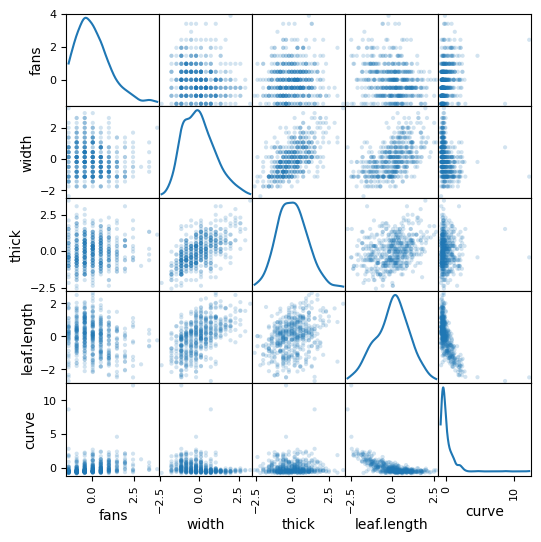

In [3]:
# Visualize ranges, correlations, density plots of values with scatter_matrix

from pandas.plotting import scatter_matrix

# Make a scatter matrix of fans, width, thick, leaf.length, and curve
scatter_matrix(df[['fans', 'width', 'thick', 'leaf.length', 'curve']], 
               alpha=0.2, figsize=(6, 6), diagonal='kde')

<Axes: xlabel='leaf.length', ylabel='curve'>

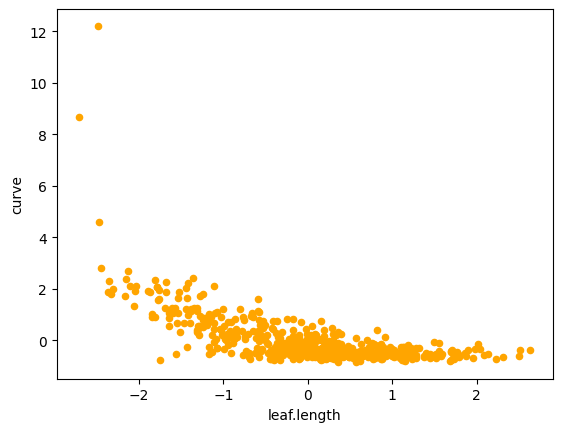

In [4]:
df.plot.scatter(x='leaf.length', y='curve', color='orange')


/home/codespace/.local/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Axes: xlabel='leaf.length', ylabel='curve'>

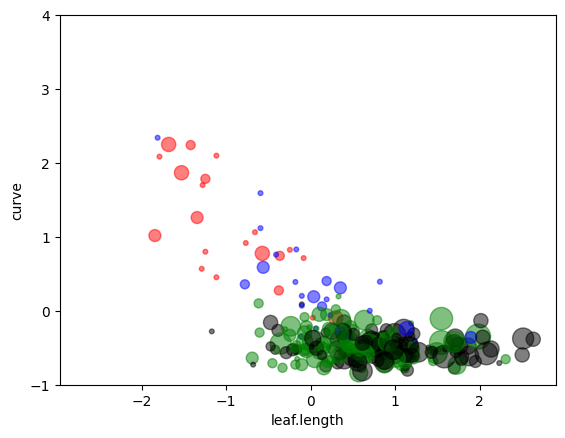

In [5]:
# Setup a dictionary to translate species names to colors
colors = {'I.mariae':'red', 'I.petrana':'blue', 
          'I.atropurpurea':'green', 'I.atrofusca':'black'}

df.plot.scatter(x='leaf.length', y='curve',
                s=df['width']*100, alpha=0.5, 
                color=df['species'].apply(lambda x: colors[x]),
                ylim=(-1,4))